In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [5]:
contract_counts = df.groupby('Contract')['Customer_id'].count() / len(df)
contract_counts

Contract
Month-to-month    0.5456
One year          0.2102
Two Year          0.2442
Name: Customer_id, dtype: float64

In [6]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [7]:
churn_counts = df.groupby('Churn')['Customer_id'].count() / len(df)
churn_counts

Churn
No     0.735
Yes    0.265
Name: Customer_id, dtype: float64

In [8]:
churn_by_contract = df.groupby(['Contract', 'Churn'])['Customer_id'].count() 
churn_by_contract

Contract        Churn
Month-to-month  No       3422
                Yes      2034
One year        No       1795
                Yes       307
Two Year        No       2133
                Yes       309
Name: Customer_id, dtype: int64

In [9]:
churn_by_contract_prop = df.groupby(['Contract', 'Churn'])['Customer_id'].count() / len(df)
churn_by_contract_prop

Contract        Churn
Month-to-month  No       0.3422
                Yes      0.2034
One year        No       0.1795
                Yes      0.0307
Two Year        No       0.2133
                Yes      0.0309
Name: Customer_id, dtype: float64

In [10]:
churn_contract = pd.crosstab(df['Churn'], df['Contract'])
churn_contract

Contract,Month-to-month,One year,Two Year
Churn,,,
No,3422,1795,2133
Yes,2034,307,309


In [11]:
chi2, p, dof, ex = stats.contingency.chi2_contingency(churn_contract, correction=False)

In [12]:
print('X2: ', chi2)

X2:  718.5915805949758


In [13]:
print('p-value: ', p)

p-value:  9.116348157571405e-157


In [14]:
print('Degrees of freedom: ', dof)

Degrees of freedom:  2


In [15]:
print('Expected frequencies: ', ex)

Expected frequencies:  [[4010.16 1544.97 1794.87]
 [1445.84  557.03  647.13]]


In [16]:
expected_df = pd.DataFrame(ex, index=['No', 'Yes'], columns=['Month-to-month', 'One year', 'Two Year'])
expected_df

,Month-to-month,One year,Two Year
No,4010.16,1544.97,1794.87
Yes,1445.84,557.03,647.13


In [17]:
chi2_results = pd.DataFrame(np.array([chi2, p, dof]).reshape(1,-1), columns=['X2-stat', 'P-value', 'DOF'])
chi2_results

,X2-stat,P-value,DOF
0,718.591581,9.116348e-157,2.0


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


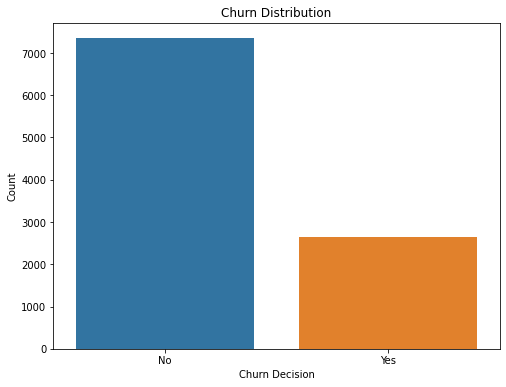

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(df['Churn'])
plt.title('Churn Distribution')
plt.xlabel('Churn Decision')
plt.ylabel('Count')
plt.show()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


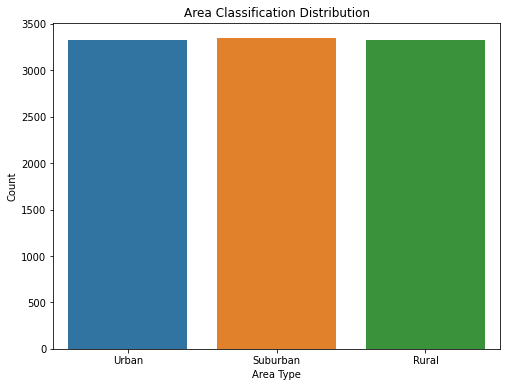

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Area'])
plt.title('Area Classification Distribution')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

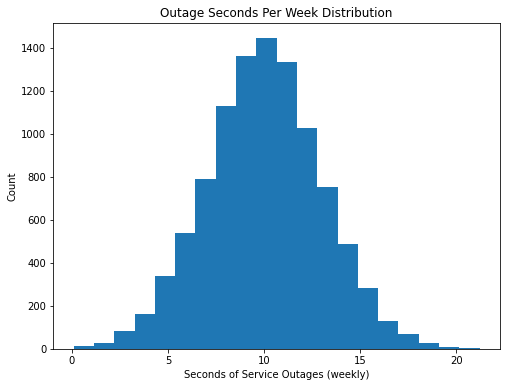

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df['Outage_sec_perweek'], bins=20)
plt.title('Outage Seconds Per Week Distribution')
plt.xlabel('Seconds of Service Outages (weekly)')
plt.ylabel('Count')
plt.show()

In [21]:
normality_test_outage = stats.shapiro(df['Outage_sec_perweek'])
print(normality_test_outage)

ShapiroResult(statistic=0.9997866749763489, pvalue=0.4358324408531189)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
print(np.mean(df['Outage_sec_perweek']))
print(np.std(df['Outage_sec_perweek']))
print(df['Outage_sec_perweek'].min())
print(df['Outage_sec_perweek'].max())

10.001848157765444
2.975870383392603
0.09974694
21.20723


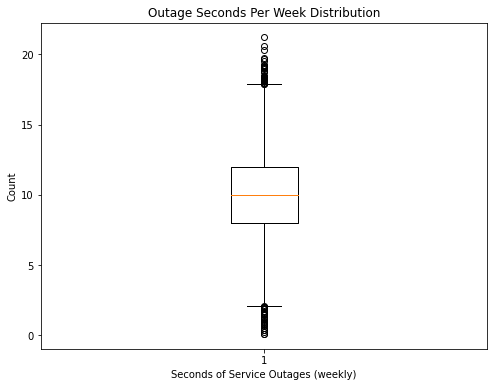

In [23]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Outage_sec_perweek'])
plt.title('Outage Seconds Per Week Distribution')
plt.xlabel('Seconds of Service Outages (weekly)')
plt.ylabel('Count')
plt.show()

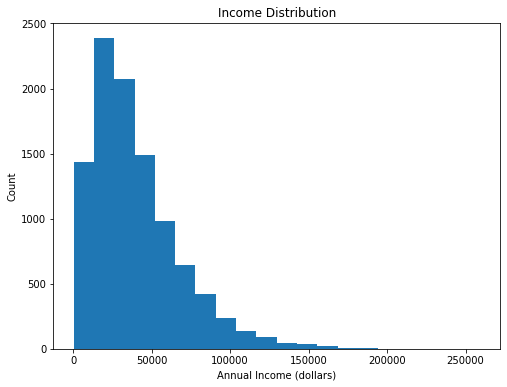

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['Income'], bins=20)
plt.title('Income Distribution')
plt.xlabel('Annual Income (dollars)')
plt.ylabel('Count')
plt.show()

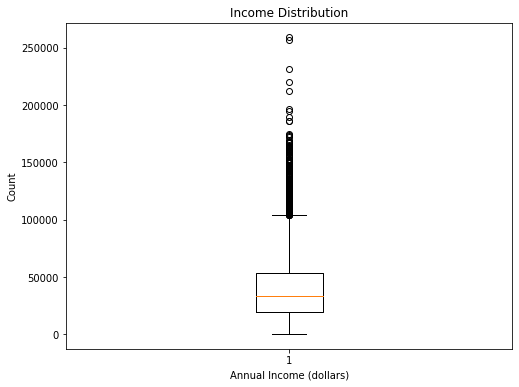

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Income'])
plt.title('Income Distribution')
plt.xlabel('Annual Income (dollars)')
plt.ylabel('Count')
plt.show()

In [26]:
normality_test_income = stats.shapiro(df['Income'])
print(normality_test_income)

ShapiroResult(statistic=0.8934258222579956, pvalue=0.0)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
print(np.mean(df['Income']))
print(np.std(df['Income']))
print(df['Income'].min())
print(df['Income'].max())

39806.9267710001
28198.506670600058
348.67
258900.7


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


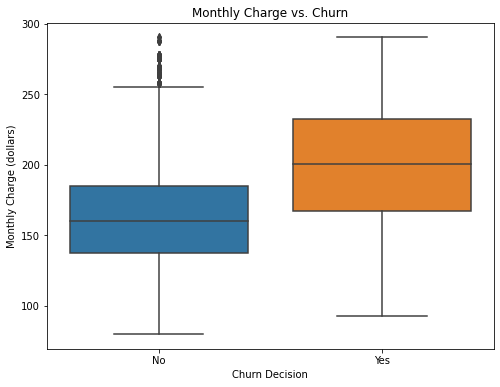

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot('Churn', 'MonthlyCharge', data=df)
plt.title('Monthly Charge vs. Churn')
plt.xlabel('Churn Decision')
plt.ylabel('Monthly Charge (dollars)')
plt.show()

In [29]:
mc_no = df[df['Churn']=='No']['MonthlyCharge']
mc_yes = df[df['Churn']=='Yes']['MonthlyCharge']

In [30]:
print(mc_no.mean())
print(mc_no.median())
print(stats.iqr(mc_no))
print(mc_no.std())
print(mc_no.min())
print(mc_no.max())

163.0089725261233
159.9642
47.53930399999999
39.32214765770693
79.97886
290.1604


In [31]:
print(mc_yes.mean())
print(mc_yes.median())
print(stats.iqr(mc_yes))
print(mc_yes.std())
print(mc_yes.min())
print(mc_yes.max())

199.29517509886819
200.1185
65.15675000000002
41.268190737390796
92.45514
290.160419


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


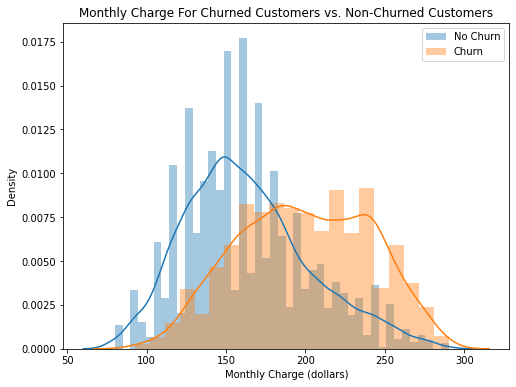

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(mc_no, label='No Churn')
sns.distplot(mc_yes, label='Churn')
plt.title('Monthly Charge For Churned Customers vs. Non-Churned Customers')
plt.xlabel('Monthly Charge (dollars)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [33]:
no_churn_normal = stats.shapiro(mc_no)
print(no_churn_normal)

ShapiroResult(statistic=0.9766845107078552, pvalue=5.365339722184876e-33)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
yes_churn_normal = stats.shapiro(mc_yes)
print(yes_churn_normal)

ShapiroResult(statistic=0.9855476021766663, pvalue=8.778657406277449e-16)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


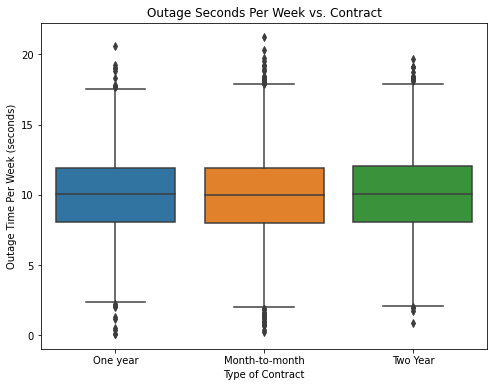

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot('Contract', 'Outage_sec_perweek', data=df)
plt.title('Outage Seconds Per Week vs. Contract')
plt.xlabel('Type of Contract')
plt.ylabel('Outage Time Per Week (seconds)')
plt.show()

In [36]:
outage_monthly = df[df['Contract']=='Month-to-month']['Outage_sec_perweek']
outage_yearly = df[df['Contract']=='One year']['Outage_sec_perweek']
outage_2yearly = df[df['Contract']=='Two Year']['Outage_sec_perweek']

In [37]:
outage_monthly_normal = stats.shapiro(outage_monthly)
print(outage_monthly_normal)

ShapiroResult(statistic=0.9996427893638611, pvalue=0.4529898762702942)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [38]:
outage_yearly_normal = stats.shapiro(outage_yearly)
print(outage_yearly_normal)

ShapiroResult(statistic=0.9987117052078247, pvalue=0.11594732850790024)


In [39]:
outage_2yearly_normal = stats.shapiro(outage_2yearly)
print(outage_2yearly_normal)

ShapiroResult(statistic=0.9989612102508545, pvalue=0.15883168578147888)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


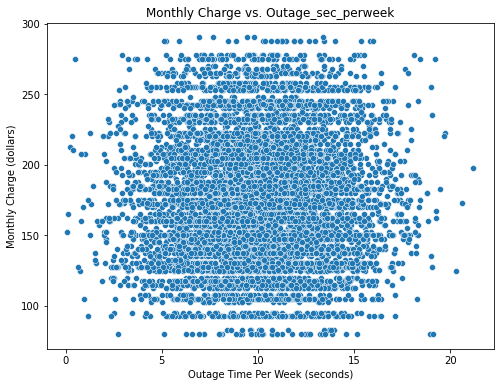

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot('Outage_sec_perweek', 'MonthlyCharge', data=df)
plt.title('Monthly Charge vs. Outage_sec_perweek')
plt.xlabel('Outage Time Per Week (seconds)')
plt.ylabel('Monthly Charge (dollars)')
plt.show()

In [41]:
np.corrcoef(df['Outage_sec_perweek'], df['MonthlyCharge'])

array([[1.        , 0.02049607],
       [0.02049607, 1.        ]])

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


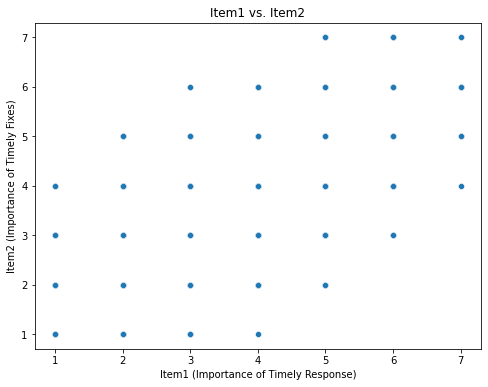

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot('Item1', 'Item2', data=df)
plt.title('Item1 vs. Item2')
plt.xlabel('Item1 (Importance of Timely Response)')
plt.ylabel('Item2 (Importance of Timely Fixes)')
plt.show()

In [43]:
np.corrcoef(df['Item1'], df['Item2'])

array([[1.        , 0.66306874],
       [0.66306874, 1.        ]])